In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('merc1.csv', sep=',')
df

,model,year,price,type,distance,fuel,tax,miles per galoon,size
0,0,2019.0,21998.0,2,11578.0,2,150.0,53.3,1.3
1,0,2014.0,10498.0,1,63177.0,0,30.0,64.2,2.1
2,0,2016.0,12498.0,1,54544.0,0,20.0,72.4,1.5
3,0,2018.0,17498.0,1,8601.0,2,145.0,51.4,1.6
4,0,2017.0,16798.0,1,24388.0,0,20.0,68.9,1.5
...,...,...,...,...,...,...,...,...,...
439,16,2016.0,26490.0,2,32494.0,0,200.0,45.6,2.2
440,16,2018.0,19498.0,1,24164.0,0,145.0,46.3,2.1
441,16,2018.0,20498.0,1,25254.0,0,145.0,46.3,2.1
442,16,2018.0,20498.0,1,20841.0,0,145.0,46.3,2.1


In [3]:
df.describe()

,model,year,price,type,distance,fuel,tax,miles per galoon,size
count,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000
mean,5.644144,2016.637752,22199.329297,1.324324,25467.468489,0.418919,128.691558,56.240469,2.097011
std,4.844716,2.065282,8053.960267,0.887965,18645.395418,0.800791,64.361121,11.415221,0.455323
min,0.000000,2009.880295,2880.000000,0.000000,17.000000,0.000000,0.000000,28.000000,1.300000
25%,2.000000,2016.000000,17493.500000,0.000000,11492.500000,0.000000,125.000000,47.900000,2.000000
50%,4.000000,2017.000000,20824.500000,2.000000,22909.000000,0.000000,145.000000,56.500000,2.100000
75%,9.000000,2018.000000,26983.750000,2.000000,34377.000000,0.000000,146.250000,64.200000,2.100000
max,16.000000,2020.000000,47718.743976,2.000000,85026.144142,2.000000,322.025955,97.628070,3.536389


In [5]:
df['age']=(2021-df['year'])
df['priceLevel']=np.where (df['price']<=22200,0,1)
df

,model,year,price,type,distance,fuel,tax,miles per galoon,size,age,priceLevel
0,0,2019.0,21998.0,2,11578.0,2,150.0,53.3,1.3,2.0,0
1,0,2014.0,10498.0,1,63177.0,0,30.0,64.2,2.1,7.0,0
2,0,2016.0,12498.0,1,54544.0,0,20.0,72.4,1.5,5.0,0
3,0,2018.0,17498.0,1,8601.0,2,145.0,51.4,1.6,3.0,0
4,0,2017.0,16798.0,1,24388.0,0,20.0,68.9,1.5,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...
439,16,2016.0,26490.0,2,32494.0,0,200.0,45.6,2.2,5.0,1
440,16,2018.0,19498.0,1,24164.0,0,145.0,46.3,2.1,3.0,0
441,16,2018.0,20498.0,1,25254.0,0,145.0,46.3,2.1,3.0,0
442,16,2018.0,20498.0,1,20841.0,0,145.0,46.3,2.1,3.0,0


In [6]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df)
df = sc.transform(df)
df = pd.DataFrame(df, columns = ['model','year','price','type','distance','fuel','tax','miles per galoon', 'size', 'age', 'priceLevel']).round()

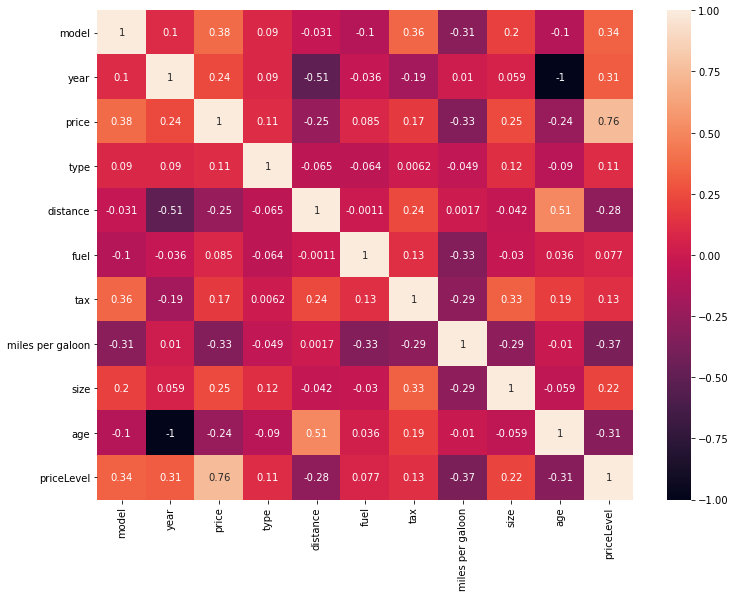

In [7]:
# Cheking correlations
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

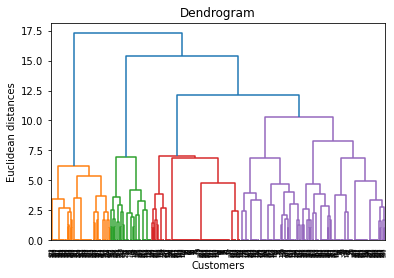

In [8]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(df, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [9]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward').fit_predict(df)

In [10]:
hc

array([0, 2, 1, 0, 1, 1, 1, 1, 2, 4, 1, 4, 1, 0, 1, 0, 1, 4, 4, 1, 1, 0,
       2, 0, 0, 1, 1, 2, 1, 2, 0, 4, 4, 4, 1, 4, 1, 1, 2, 0, 2, 0, 4, 4,
       2, 0, 1, 1, 4, 1, 1, 1, 2, 1, 4, 1, 1, 1, 4, 1, 4, 1, 1, 0, 0, 2,
       1, 1, 0, 1, 1, 2, 1, 2, 0, 2, 1, 4, 0, 4, 1, 0, 1, 0, 1, 2, 4, 2,
       4, 1, 0, 1, 4, 2, 3, 1, 4, 4, 4, 1, 4, 4, 4, 1, 1, 0, 1, 4, 4, 0,
       4, 4, 1, 4, 4, 1, 0, 1, 2, 1, 1, 4, 2, 4, 1, 2, 4, 4, 2, 1, 4, 4,
       1, 4, 1, 4, 4, 4, 1, 2, 1, 0, 1, 1, 1, 4, 1, 1, 1, 2, 4, 2, 1, 4,
       4, 4, 2, 1, 4, 4, 1, 0, 4, 4, 4, 4, 1, 4, 4, 1, 0, 4, 4, 4, 1, 1,
       3, 1, 1, 0, 1, 2, 1, 1, 1, 1, 2, 0, 2, 1, 2, 2, 4, 1, 4, 1, 4, 0,
       4, 2, 0, 1, 1, 0, 1, 4, 4, 1, 1, 1, 2, 1, 2, 2, 1, 0, 2, 0, 0, 4,
       1, 2, 1, 2, 0, 0, 2, 4, 3, 4, 3, 0, 0, 3, 1, 0, 0, 1, 1, 0, 0, 2,
       1, 2, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 4, 4, 1, 1, 0, 1, 0, 1, 4, 3,
       4, 3, 1, 0, 4, 0, 1, 3, 1, 1, 1, 4, 2, 0, 2, 1, 0, 0, 2, 1, 0, 1,
       1, 2, 0, 1, 0, 0, 0, 0, 4, 2, 1, 1, 4, 4, 1,

In [11]:
# Less features
X = df.iloc[:, [2,7,9]]

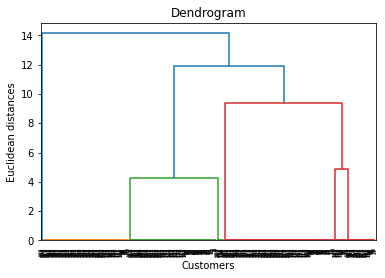

In [12]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [13]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward').fit_predict(df)

In [14]:
# Export hc clusters
import pickle
obj = {'hc': hc}
output = open('cluster_1.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()